**Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?**
- ANSWER: A Convolutional Neural Network (CNN) is a specialized type of neural network designed primarily for processing grid-like data such as images. Unlike traditional fully connected neural networks (FCNNs), CNNs are able to automatically learn spatial features like edges, textures, and shapes directly from raw image pixels.

  In a fully connected neural network, every neuron in one layer is Connected to every neuron in the next layer. When applied to images, this results in a very large number of parameters, making the model computationally expensive and prone to overfitting. Additionally, FCNNs do not preserve spatial relationships between pixels, which are crucial in image understanding.

  CNNs overcome these limitations through three key architectural ideas:
 **1. Convolution** layers use small filters (kernels) that slide over the image to extract local features.

 **2. Parameter** sharing reduces the total number of trainable Parameters, improving efficiency.

 **3. Pooling** layers downsample feature maps, making the model robust to small translations.

In terms of performance, CNNs significantly outperform FCNNs on image data because they:
* Capture spatial hierarchies (edges → shapes → objects)
* Require fewer parameters
* Generalize better on unseen images
Thus, CNNs are the foundation of modern computer vision tasks such as image classification, object detection, and face recognition.

**Question 2. Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.**
- ANSWER: LeNet-5 is one of the earliest and most influential convolutional neural network architectures, proposed by **Yann LeCun et al**. in 1998 for handwritten digit recognition.
The architecture of LeNet-5 consists of the following layers:

  1. **Input Layer:** 32×32 grayscale image
  2. **C1 (Convolutional Layer):** 6 feature maps using 5×5 filters
  3. **S2 (Subsampling Layer):** Average pooling to reduce spatial dimensions
  4. **C3 (Convolutional Layer):** 16 feature maps
  5. **S4 (Subsampling Layer):** Further spatial reduction
  6. **C5 (Fully Connected Convolution):** 120 neurons
  7. **F6 (Fully Connected Layer):** 84 neurons
  8. **Output Layer:** 10 neurons (digits 0–9)
LeNet-5 introduced several groundbreaking concepts:

Convolutional feature extraction

 - Weight sharing
 - Subsampling (pooling)
 - End-to-end learning using backpropagation

These ideas became the backbone of modern CNN architectures such as AlexNet, VGG, and ResNet. Although LeNet-5 was shallow by today’s standards, it demonstrated that neural networks could automatically learn visual features, eliminating the need for manual feature engineering

**Question 3. Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.**
- ANSWER: **AlexNet and VGGNet** are landmark CNN architectures that significantly advanced image classification performance.

  **AlexNet (2012)** introduced deep learning to large-scale vision tasks by winning the ImageNet competition. Its key innovations include:

 Use of **ReLU** activation to speed up training
 - **Dropout** to reduce overfitting
 - **GPU-based training**
 - Large convolutional filters in early layers

 **AlexNet** has approximately **60 million parameters**, making it computationally heavy but revolutionary for its time. However, its use of large kernels increased complexity and memory usage.

 **VGGNet (2014)** focused on architectural simplicity and depth. Its key design principles are:
 - Using small 3×3 convolution filters
 - Increasing network depth (16 or 19 layers)
 - Uniform architecture throughout the network

 VGGNet contains around **138 million parameters**, making it more accurate but also more memory-intensive than AlexNet. While VGG achieved better performance, its main limitation is high computational and storage cost.

**Question 4. What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.**
 - ANSWER: **Transfer learning** is a technique where a model trained on a large dataset (such as ImageNet) is reused for a different but related task. In image classification, this usually involves taking a pre-trained CNN and adapting it to a new dataset.

   Instead of training a model from scratch, the earlier layers (which learn general features like edges and textures) are reused, while the final layers are fine-tuned for the new task.

   Transfer learning offers several advantages:

   - **Reduced computational cost:** Training only a few layers requires less time and hardware
   - **Better performance with small datasets:** Pre-trained features generalize well
   - **Faster convergence:** The model starts with learned weights instead of random initialization

**Question 5. Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?**
- ANSWER: **Residual connections**, introduced in ResNet, allow information to bypass one or more layers by adding the input directly to the output of a block.
  
   Mathematically:
              
                       y=F(x)+x
 Here, the network learns a **residual function** instead of a complete mapping.

 Residual connections solve the **vanishing gradient problem** by:

 - Allowing gradients to flow directly through shortcut paths
 - Preventing degradation of performance as depth increases
 - Making very deep networks (50, 101, 152 layers) trainable

 By simplifying optimization, ResNet enabled the development of extremely deep CNNs that achieved state-of-the-art accuracy in image classification tasks.



In [2]:
#Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.

import tensorflow as tf
from tensorflow.keras import layers, models
import time

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
# Reshape to add a channel dimension first (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Padding to 32x32
x_train = tf.pad(x_train, [[0,0],[2,2],[2,2],[0,0]])
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2],[0,0]])

# Convert to float32 and normalize
x_train = tf.cast(x_train, tf.float32) / 255.0
x_test = tf.cast(x_test, tf.float32) / 255.0

# LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32,32,1)),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=5, activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
start_time = time.time()
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
end_time = time.time()

# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Training Time:", end_time - start_time)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8151 - loss: 0.6571 - val_accuracy: 0.9610 - val_loss: 0.1385
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9537 - loss: 0.1538 - val_accuracy: 0.9732 - val_loss: 0.0967
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.9684 - loss: 0.1014 - val_accuracy: 0.9775 - val_loss: 0.0779
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9787 - loss: 0.0709 - val_accuracy: 0.9803 - val_loss: 0.0681
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9822 - val_loss: 0.0616
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9748 - loss: 0.0713
Test Accuracy: 0.9793999791145325
Training Time: 188.45144414901733


In [3]:
#Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model. Include your code and result discussion.

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Create a dummy dataset structure for demonstration purposes
def create_dummy_dataset(base_dir='dataset', num_classes=2, img_size=(224, 224), num_images_per_class=10):
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for i in range(num_classes):
        class_name = f'class_{i}'
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        for j in range(num_images_per_class):
            # Create a dummy image (black image)
            dummy_image = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
            img_path = os.path.join(class_dir, f'image_{j}.png')
            tf.keras.utils.save_img(img_path, dummy_image)
    print(f"Dummy dataset created at {base_dir} with {num_classes} classes and {num_images_per_class} images per class.")

# Call the function to create the dummy dataset if it doesn't exist
create_dummy_dataset('dataset', num_classes=2, num_images_per_class=10)

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

try:
    train_data = datagen.flow_from_directory(
        'dataset/',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        'dataset/',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )
except FileNotFoundError as e:
    print(f"Error loading dataset: {e}. Please ensure the 'dataset/' directory exists and contains image data.")
    exit() # Exit or handle the error appropriately


# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, epochs=5, validation_data=val_data)


Dummy dataset created at dataset with 2 classes and 10 images per class.
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 9.4949
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 9.4949 - val_accuracy: 0.5000 - val_loss: 4.0635
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 4.0635 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


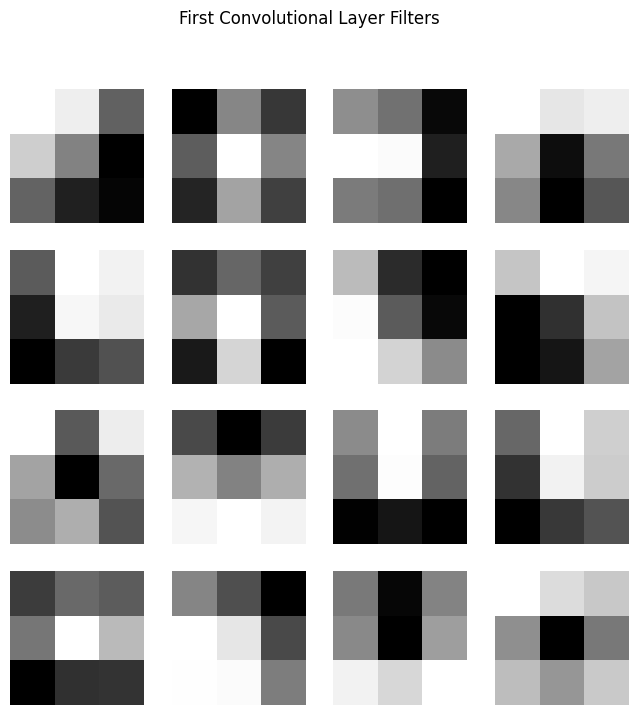

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


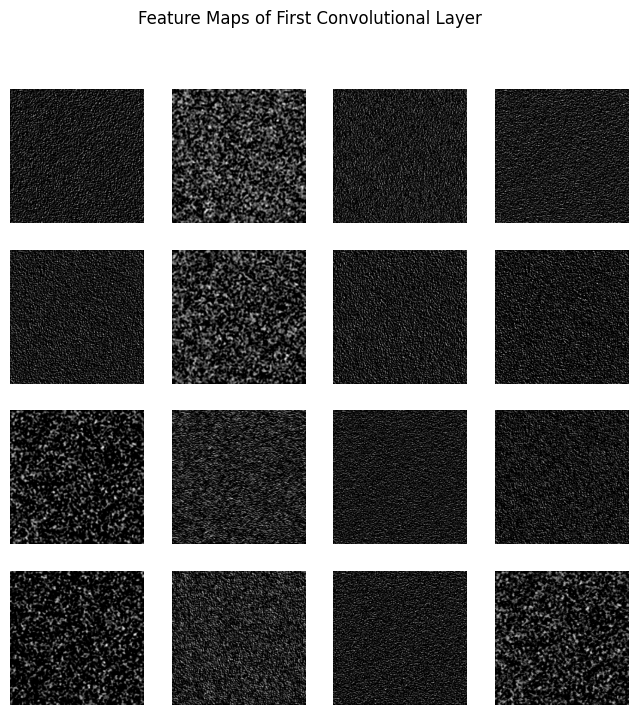

In [4]:
#Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Get the first convolutional layer
first_conv_layer = model.layers[1]

# Extract filters
filters, biases = first_conv_layer.get_weights()

# Normalize filter values for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot first 16 filters
fig, axes = plt.subplots(4, 4, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(filters[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.suptitle("First Convolutional Layer Filters")
plt.show()

# Create a dummy 'sample.jpg' image if it doesn't exist
if not tf.io.gfile.exists('sample.jpg'):
    dummy_image_data = np.random.randint(0, 256, size=(224, 224, 3), dtype=np.uint8)
    tf.keras.utils.save_img('sample.jpg', dummy_image_data)

# Load and preprocess image
img = image.load_img('sample.jpg', target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# Feature map model
feature_model = Model(inputs=model.inputs, outputs=first_conv_layer.output)
feature_maps = feature_model.predict(img)

# Plot feature maps
fig, axes = plt.subplots(4, 4, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.suptitle("Feature Maps of First Convolutional Layer")
plt.show()

In [ ]:
#Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.image.resize(x_train, (299,299)) / 255.0
x_test = tf.image.resize(x_test, (299,299)) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 71s 0us/step


**Question 10: You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal,pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.**

 - ANSWER. Given limited labeled medical data, the most suitable approach is transfer learning using a pre-trained CNN, such as ResNet50 or InceptionV3.

**Proposed Approach:**

- Use a CNN pre-trained on ImageNet
- Replace the final classification layer with a 3-class output
- Freeze early layers and fine-tune higher layers
- Apply data augmentation (rotation, flipping, contrast adjustment)

**Justification:**
- Medical images share low-level features with natural images
- Transfer learning reduces overfitting
- Faster training with limited data
- Proven effectiveness in medical imaging tasks

**Deployment Strategy:**
 - Model trained offline on GPU
 - Optimized using TensorFlow Lite or ONNX
 - Deployed via REST API on cloud or edge devices
 - Continuous monitoring and periodic retraining with new data

This approach ensures high accuracy, scalability, and real-world feasibility in healthcare environments.

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Create a dummy dataset structure with train/val splits and classes
def create_nested_dummy_dataset(base_dir='dataset', num_classes=3, img_size=(224, 224), num_images_per_class=10):
    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'val')

    # Ensure base directory exists
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    # Create train and validation directories if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for i in range(num_classes):
        class_name = f'class_{i}'
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Create dummy images for training
        for j in range(num_images_per_class):
            dummy_image = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
            img_path = os.path.join(train_class_dir, f'image_{j}.png')
            tf.keras.utils.save_img(img_path, dummy_image)

        # Create a few dummy images for validation
        for j in range(num_images_per_class // 2):
            dummy_image = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
            img_path = os.path.join(val_class_dir, f'image_{j}.png')
            tf.keras.utils.save_img(img_path, dummy_image)

    print(f"Nested dummy dataset created at {base_dir} with {num_classes} classes and train/val splits.")

# Call the function to create the dummy dataset if it doesn't exist
create_nested_dummy_dataset('dataset', num_classes=3, num_images_per_class=10)

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

try:
    train_data = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    val_data = val_datagen.flow_from_directory(
        'dataset/val',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )
except FileNotFoundError as e:
    print(f"Error loading dataset: {e}. Please ensure the 'dataset/train' and 'dataset/val' directories exist and contain image data.")
    exit() # Exit or handle the error appropriately

# Load ResNet50
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Nested dummy dataset created at dataset with 3 classes and train/val splits.
Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.5403 - loss: 1.2617 - val_accuracy: 0.3333 - val_loss: 1.1149
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.3069 - loss: 1.2118 - val_accuracy: 0.3333 - val_loss: 1.1567
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.3651 - loss: 1.3436 - val_accuracy: 0.3333 - val_loss: 1.1813
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.3190 - loss: 1.3028 - val_accuracy: 0.3333 - val_loss: 1.1357
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.3190 - loss: 1.2722 - val_accuracy: 0.3333 - val_loss: 1.1124
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.3635 - loss: 1.2188 - val_accuracy: 0.3333 - val_loss: 1.1053
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.2403 - loss: 1.3857 - val_accuracy: 0.3333 - val_loss: 1.1041
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.3175 - loss: 1.1270 - val_accuracy: 0.3333 - val_loss: 1.1025
Epoch 9/10
2/2 